In [1]:
from modules import ana_moment_fit
from modules import constants as cnst
from modules import gram_schmidt
from scipy.interpolate import interp1d
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
def mbb(nu,T,A,alpha,nu0=1.):
    x=cnst.planck_const*nu*cnst.ghz2hz/(cnst.boltzman_const*T)
    Inu=A*((nu/nu0)**alpha)*(nu**3.)/(np.exp(x)-1.)
    return Inu

def multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=1.):
    Inu=mbb(nu,T1,A1,alpha1,nu0=nu0) + mbb(nu,T2,A2,alpha2,nu0=nu0)
    return Inu

f=0.34188
T1=9.75 ; A1=f; alpha1=1.63; T2=15.7 ; A2 =(1.-f); alpha2=2.82

Abar=A1+A2
Tbar=Abar/((A1/T1)+(A2/T2))
nu0=cnst.boltzman_const*Tbar/cnst.planck_const/cnst.ghz2hz
print Abar,Tbar,nu0

#nu=logspace(log10(100),log10(3000),200)
nu=[100.,143.,217.,353.,545., 857.] ; nu=np.array(nu)
Inu=multitemp_mbb_spectra(nu,T1,A1,alpha1,T2,A2,alpha2,nu0=3000.)


fn=interp1d(nu,Inu,kind="quadratic") ; norm=3388/fn(100.)
Inu=Inu*norm

#figure()
#plot(nu,Inu)
#plot(nu,mbb(nu,T1,A1,alpha1,nu0=3000.),"b--",lw=2)
#plot(nu,mbb(nu,T2,A2,alpha2,nu0=3000.),"r--",lw=2)
#loglog()
#ylabel(r"$I_{\nu}$")
#xlabel(r"$\nu$[GHz]")
#grid()
#legend(loc=0)
#xticks([100,353,545,857,3000],[100,353,545,857,3000])

1.0 12.9898662496 270.664805898


In [3]:
mf=ana_moment_fit.moment_fit(8)

In [4]:
par0=mf.fit_monopole(nu,Inu,0,maxfev=200000,bounds_true=True) ; print par0
par2=mf.fit_monopole(nu,Inu,2,maxfev=200000,bounds_true=True) ; print par2
#par3=mf.fit_monopole(nu,Inu,3,maxfev=200000) ; print par3

You provided no guesses
Fitting for 3  parameters
[  7.71786364e-03   2.13927105e+01   1.40116338e+00]
You provided no guesses
Fitting for 6  parameters
[  1.91458777e-02   3.09720272e+01   3.82807189e-01   1.44229800e-01
  -3.88991179e-01  -3.75763824e-01]


/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


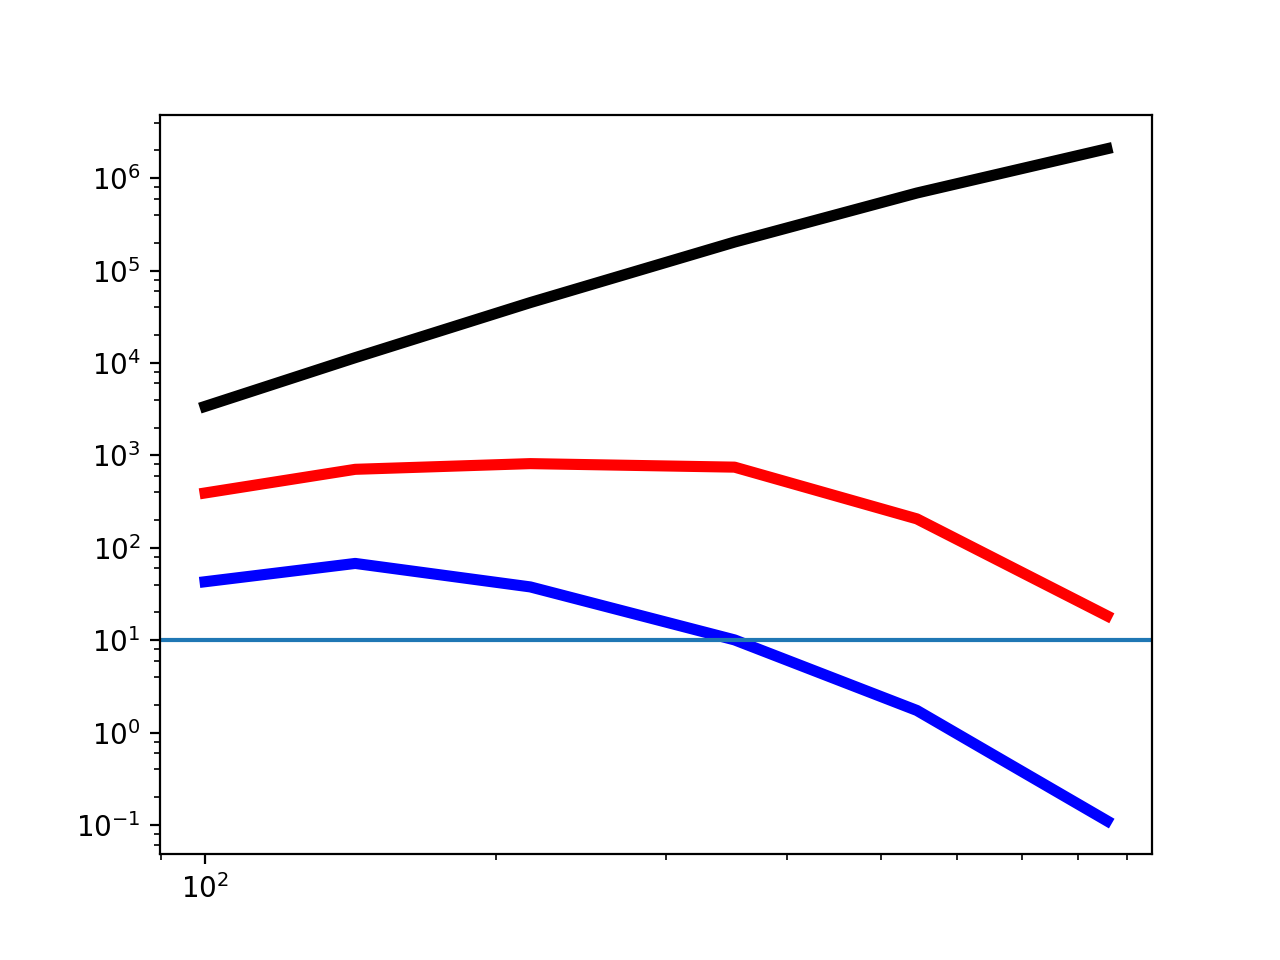

[]

In [5]:
figure()
plot(nu,Inu,"k-",lw=4)
plot(nu,abs(Inu-mf.moment_exact(nu,*par0)),"r-",lw=4)
plot(nu,abs(Inu-mf.moment_exact(nu,*par2)),"b-",lw=4)
#plot(nu,abs(Inu-mf.moment_exact(nu,*par3)),"g-",lw=4)
axhline(10.)
loglog()

In [6]:
A=par0[0] ; T=par0[1] ; slope=par0[2]
ppar1=mf.fit_around_monopole(nu,Inu,1,A,T,slope)
ppar2=mf.fit_around_monopole(nu,Inu,2,A,T,slope)
#ppar3=mf.fit_around_monopole(nu,Inu,3,A,T,slope)
#ppar4=mf.fit_around_monopole(nu,Inu,4,A,T,slope)
#ppar5=mf.fit_around_monopole(nu,Inu,5,A,T,slope)
#ppar6=mf.fit_around_monopole(nu,Inu,6,A,T,slope)
#ppar7=mf.fit_around_monopole(nu,Inu,7,A,T,slope)
#ppar8=mf.fit_around_monopole(nu,Inu,8,A,T,slope)

Fitting for 3  parameters
Fitting for 6  parameters


<IPython.core.display.Javascript object>


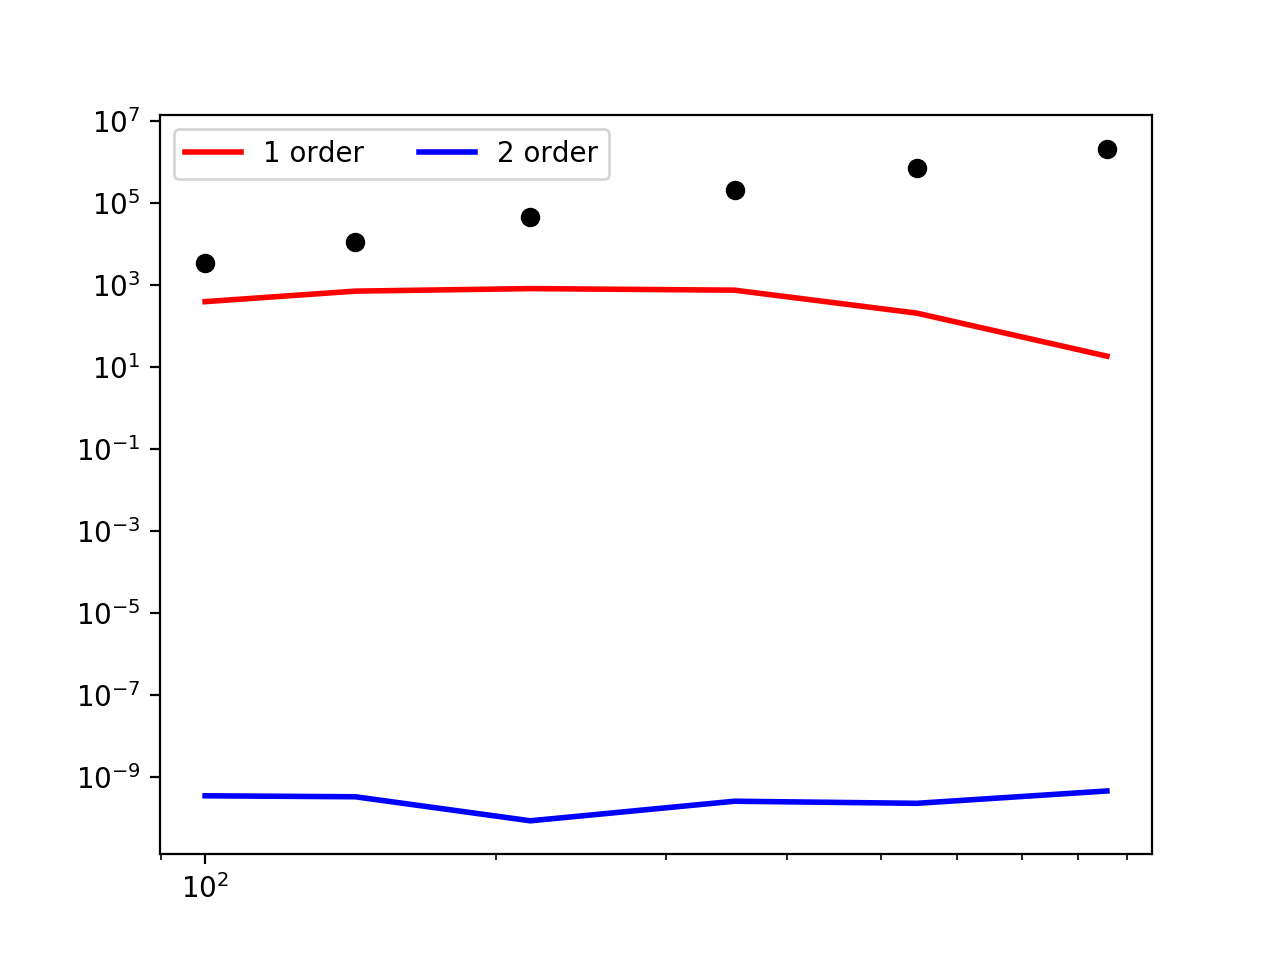

In [7]:
figure()
plot(nu,Inu,"ko",lw=2)
plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar1)),"r-",lw=2,label="1 order")
plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar2)),"b-",lw=2,label="2 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar3)),"m-",lw=2,label="3 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar4)),"c-",lw=2,label="4 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar5)),"y-",lw=2,label="5 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar6)),"-",lw=2,label="6 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar7)),"-",lw=2,label="7 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar8)),"-",lw=2,label="8 order")
legend(loc="upper left",ncol=3)
#hlines(1)
loglog()
savefig("perturbative_around_0order_fit.pdf",dpi=150,bbox_inches="tight")

In [8]:
A=par2[0] ; T=par2[1] ; slope=par2[2]
ppar1=mf.fit_around_monopole(nu,Inu,1,A,T,slope)
ppar2=mf.fit_around_monopole(nu,Inu,2,A,T,slope)
#ppar3=mf.fit_around_monopole(nu,Inu,3,A,T,slope)
#ppar4=mf.fit_around_monopole(nu,Inu,4,A,T,slope)
#ppar5=mf.fit_around_monopole(nu,Inu,5,A,T,slope)
#ppar6=mf.fit_around_monopole(nu,Inu,6,A,T,slope)
#ppar7=mf.fit_around_monopole(nu,Inu,7,A,T,slope)
#ppar8=mf.fit_around_monopole(nu,Inu,8,A,T,slope)

Fitting for 3  parameters
Fitting for 6  parameters


<IPython.core.display.Javascript object>


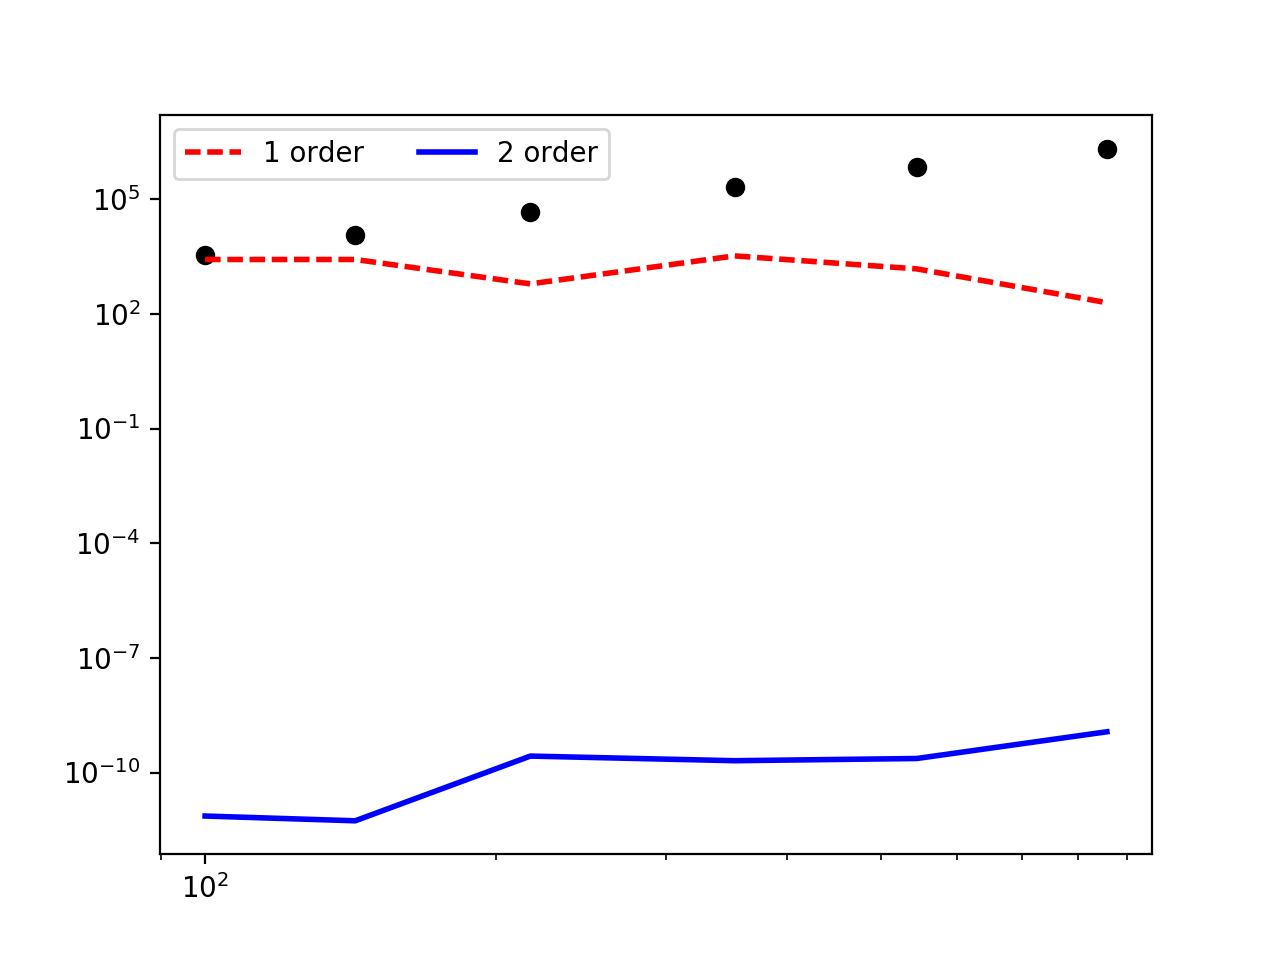

In [9]:
figure()
plot(nu,Inu,"ko",lw=2)
plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar1)),"r--",lw=2,label="1 order")
plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar2)),"b-",lw=2,label="2 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar3)),"m-",lw=2,label="3 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar4)),"c-",lw=2,label="4 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar5)),"y-",lw=2,label="5 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar6)),"-",lw=2,label="6 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar7)),"-",lw=2,label="7 order")
#plot(nu,abs(Inu-mf.moment_perturbative(nu,A,T,slope,*ppar8)),"-",lw=2,label="8 order")
legend(loc="upper left",ncol=3)
loglog()
savefig("perturbative_around_3order_fit.pdf",dpi=150,bbox_inches="tight")

In [10]:
T=par2[1] ; slope=par2[2]
gs=gram_schmidt.gram_schmidt_fitting(8)
gs.gen_vectors(nu,T,slope)
gs.gram_schmidt_iterative(tol=1e-14,iter=100)

0
1


<IPython.core.display.Javascript object>


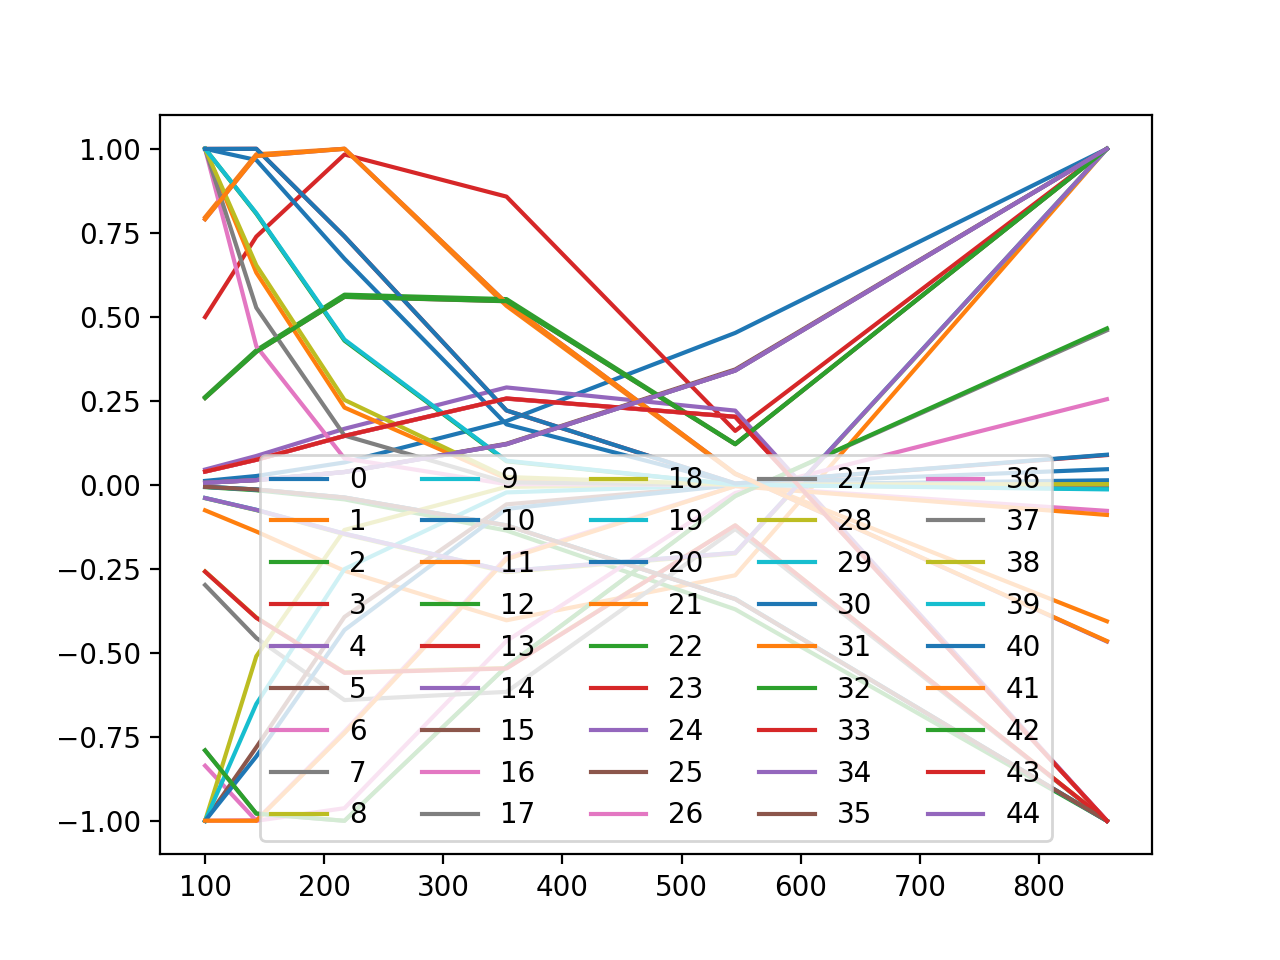

<IPython.core.display.Javascript object>


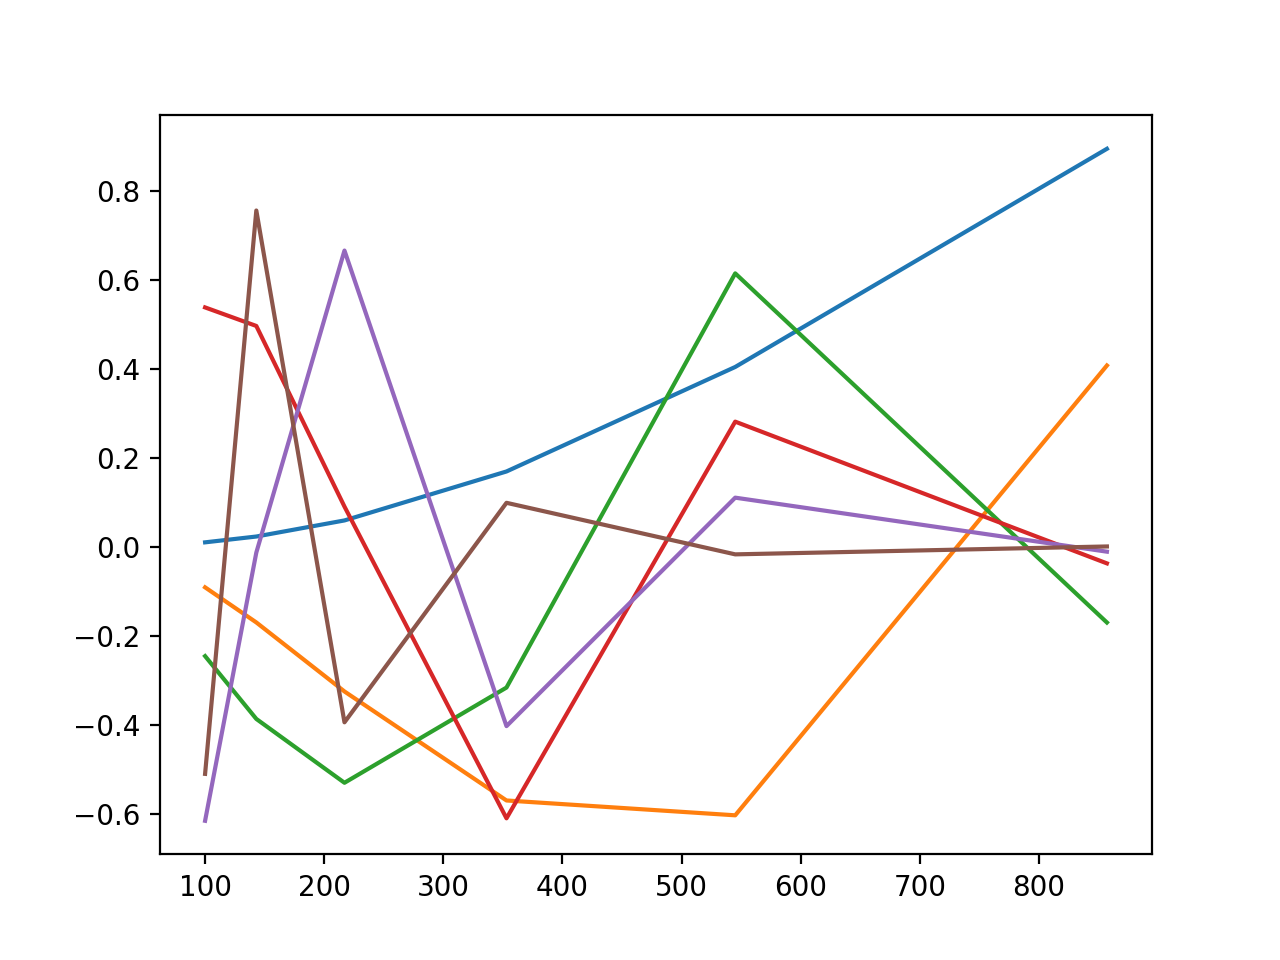

<IPython.core.display.Javascript object>


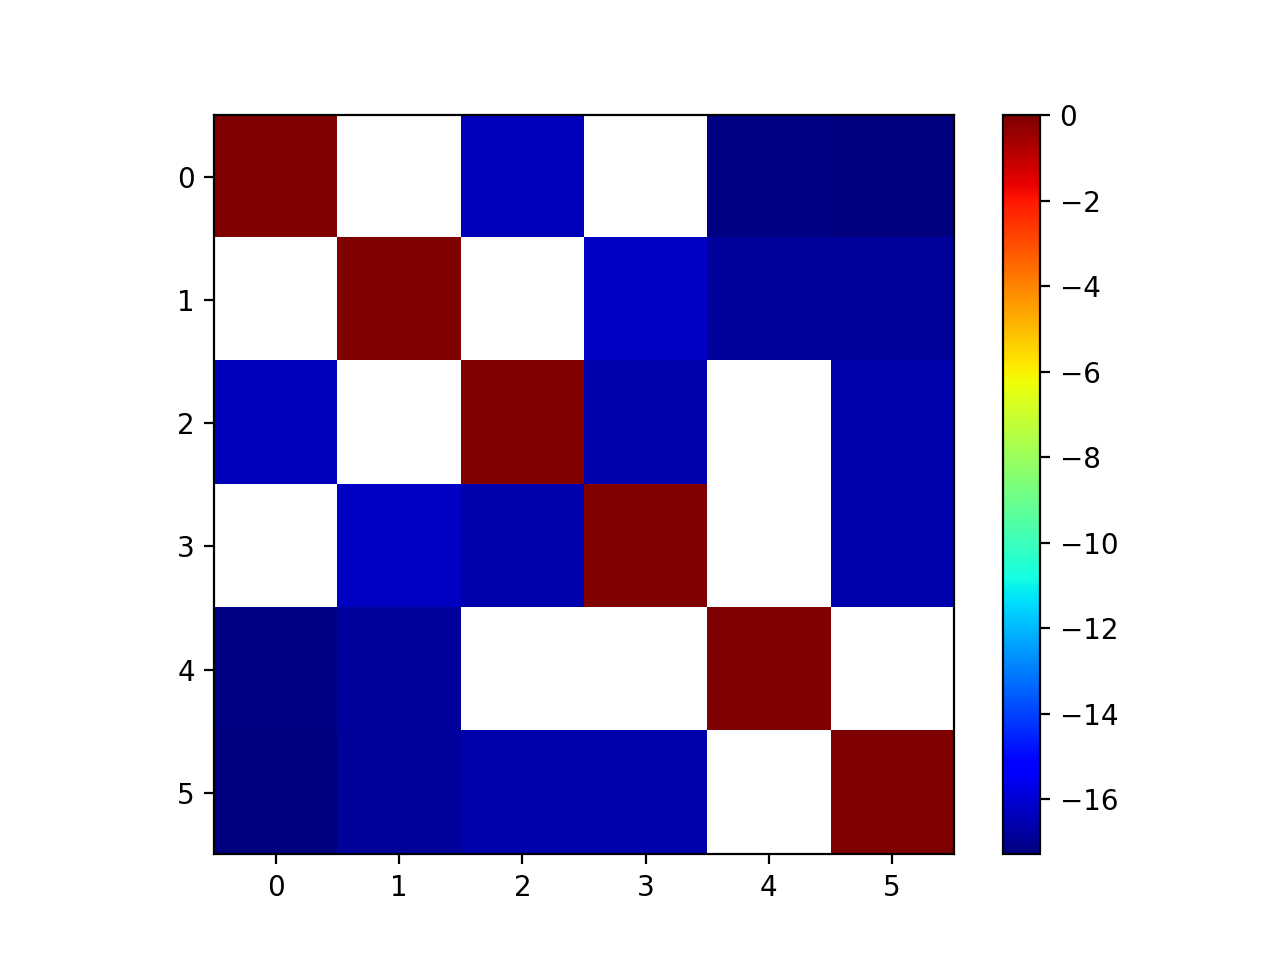

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log10


In [13]:
figure()
for i in range(len(gs.vectors)):
    plot(nu,gs.vectors[i],label=str(i))
legend(loc=0,ncol=5)

figure()
for i in range(shape(gs.basis)[0]):
    plot(nu,gs.basis[i],label=str(i))
#legend(loc=0,ncol=5)

cov=zeros((shape(gs.basis)[0],shape(gs.basis)[0]),float)
for i in range(shape(gs.basis)[0]):
    for j in range(shape(gs.basis)[0]):
        cov[i,j]=np.dot(gs.basis[i],gs.basis[j])
        
figure()
imshow(log10(abs(cov)))
colorbar()

0


<IPython.core.display.Javascript object>


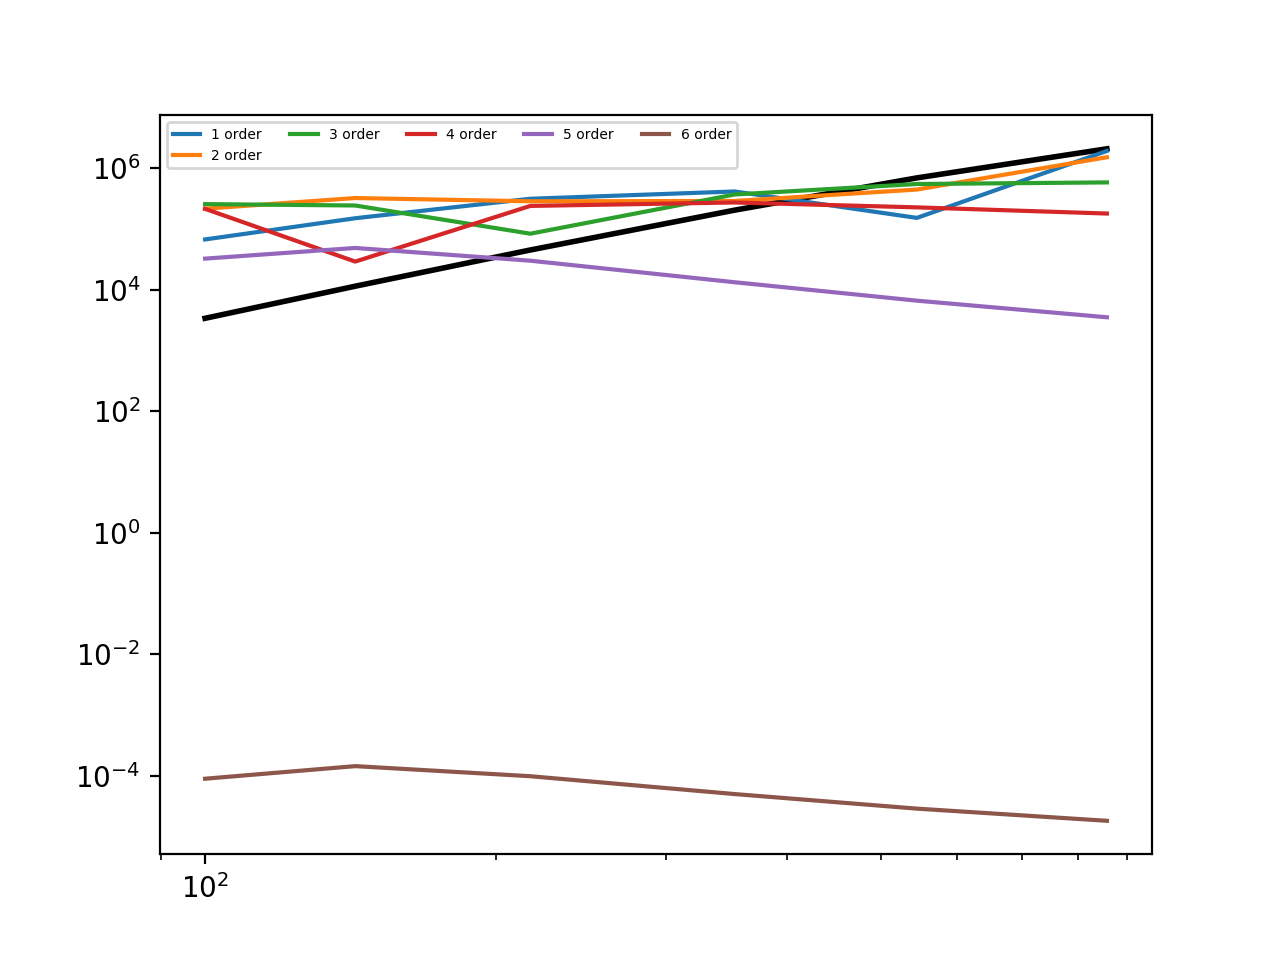

In [14]:
T=5. ; slope=1.
gs=gram_schmidt.gram_schmidt_fitting(8)
gs.gen_vectors(nu,T,slope)
gs.gram_schmidt_iterative(tol=1e-14,iter=100)

figure()
plot(nu,Inu,"k-",lw=2)
for i in range(6):
    gpar=gs.get_gram_schmidt_param(Inu,i+1,n_is_der_order=False)
    plot(nu,abs(Inu-gs.reconstruct_sed(*gpar)),label=str(i+1) + " order")
loglog()
legend(loc=0,ncol=5,fontsize=5)
savefig("gs_fit_around_3order_fit.pdf",dpi=150,bbox_inches="tight")